# Исследование надёжности заёмщиков — анализ банковских данных

Кредитный отдела банка - заказчик исследования.
Входные данные от банка - статистика о платежеспособности клиентов.

**Цель исследования** — ответить на вопросы:
1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**

Данные о поведении пользователей мы получим из файла `data.csv`. О качестве данных ничего не известно. Поэтому понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Проверка-данных-на-аномалии" data-toc-modified-id="Проверка-данных-на-аномалии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка данных на аномалии</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Формирование-дополнительных-датафреймов-словарей,-декомпозиция-исходного-датафрейма" data-toc-modified-id="Формирование-дополнительных-датафреймов-словарей,-декомпозиция-исходного-датафрейма-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма</a></span></li><li><span><a href="#Категоризация-дохода" data-toc-modified-id="Категоризация-дохода-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация дохода</a></span></li><li><span><a href="#Категоризация-целей-кредита" data-toc-modified-id="Категоризация-целей-кредита-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Категоризация целей кредита</a></span></li></ul></li><li><span><a href="#Ответы-на-вопросы" data-toc-modified-id="Ответы-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответы на вопросы</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между количеством детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

Импортируем библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Прочитаем файл `data.csv` из папки `datasets` и сохраним его в переменной `df`:

In [2]:
df = pd.read_csv('datasets/data.csv')

Выведем на экран первые пять строк таблицы `df`:

In [3]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов, 21525 строк. Тип данных в столбцах: `object`, `float`, `int64`.

Описание данных
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

В названиях столбцов нет нарушений стиля.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

## Предобработка данных

### Заполнение пропусков

Сначала посчитаем количество пропущенных значений в таблице:

In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В столбцах `days_employed` и `income_type` есть пропущенные значения: по 2174 в каждой колонке.
Проверим: пропущены ли значения одновременно в обоих столбцах во всех 2174 строках и посчитаем долю пропущенных значений

In [6]:
df[(df['days_employed'].isna()) & (df['total_income'].isna())].shape[0]

2174

In [7]:
print('доля пропущенных значений составляет: {:.0%}'.format(df['days_employed'].isna().mean()))

доля пропущенных значений составляет: 10%


Действительно, в исходной таблице мы имеем 2174 строк, в каждой из которой одновременно пропущены значения в столбцах `days_employed` и `income_type`.

**Возможная причина** появления такого рода пропущенных значений - это выдача банком кредитов без подтверждения дохода, то есть без предоставления заёмщиком данных о заработной плате и трудовом стаже.

Заполним пропуски в столбцах с количесвенными переменными медианными значениями, так как медиана устойчива к выбросам.

Посмотрим на значения, которые лежат в столбце `total_income` - ежемесячный доход

In [8]:
df['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

Заполним пропуски в столбце `total_income` медианными значениями дохода в каждом типе занятости, для чего будем использовать метод `transform` в связке с `groupby`

In [9]:
df.fillna({'total_income': df.groupby('income_type')['total_income'].transform('median')}, inplace=True)

In [10]:
print('Количество пропущенных значений в столбце \'total_income\':', df['total_income'].isna().sum())

Количество пропущенных значений в столбце 'total_income': 0


### Проверка данных на аномалии

Посмотрим на значения, которые лежат в столбце `days_employed`

In [11]:
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [12]:
df['days_employed'].value_counts(bins=[-20_000, 0, 66_000, 316_000, 402_000]).sort_index()

(-20000.001, 0.0]       15906
(0.0, 66000.0]              0
(66000.0, 316000.0]         0
(316000.0, 402000.0]     3445
Name: days_employed, dtype: int64

Видим, что в столбце `days_employed` есть отрицательные значения в диапазоне от -18388 до 0, и значения больше 316 тысяч дней (870 лет). Возможная причина появления аномалий - это указание значений не в днях, а в часах для значений больше 316 тысяч, и случано поставленный знак минус или тире перед отрицательными значениями, или неверная формула расчёта трудового стажа, в которой дата начала стажа и конца стажа перепутаны местами. 

Напишем функцию `days_employed_modify` для преобразования значений: значения больше 316 тысяч разделим на 24, а отрицательные значения сделаем положительными и применим эту функцию ко всем значениям столбца `days_employed`. Обработаем ошибку типа данных в функции с помощью `try except`

In [13]:
def days_employed_modify(x):
    try:
        if x > 316_000:
            x/=24
        return abs(x)
    except TypeError:
        return f'Исключение TypeError для данных'

In [14]:
df['days_employed'] = df['days_employed'].apply(days_employed_modify)

In [15]:
df['days_employed'].describe()

count    19351.000000
mean      4641.641176
std       5355.964289
min         24.141633
25%        927.009265
50%       2194.220567
75%       5537.882441
max      18388.949901
Name: days_employed, dtype: float64

Теперь можно заполнить пропуски в столбце `days_employed` медианными значениями:

In [16]:
df['days_employed'].fillna(df['days_employed'].median(), inplace=True)
print('Медианное значение столбца \'days_employed\':', df['days_employed'].median())
print('Количество пропущенных значений в столбце \'days_employed\':', df['days_employed'].isna().sum())

Медианное значение столбца 'days_employed': 2194.220566878695
Количество пропущенных значений в столбце 'days_employed': 0


Посмотрим на значения в столбце `children` - количество детей

In [17]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце `children` есть аномалии значений. Исправим значение "-1" на "1" (ошибка постановки тире перед значением), а "20" как ошибку при вводе числа исправим на "2". Заменим значения на корректные с помощью логической индексации:

In [18]:
df.loc[df['children'] == -1, 'children'] = 1
df.loc[df['children'] == 20, 'children'] = 2
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Посмотрим на значения в столбце `dob_years` - возраст клиента в годах

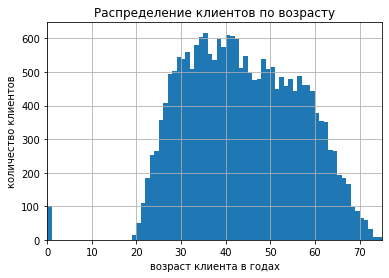

In [19]:
df.plot(y='dob_years', kind='hist', bins=75, grid=True, title='Распределение клиентов по возрасту', legend=False)
plt.xlim(0, 75)
plt.xlabel('возраст клиента в годах')
plt.ylabel('количество клиентов')
plt.show()

Видим небольшое количество нулевых значений. Так как этот столбец не влияет на ответы на поставленные в исследовании вопросы, то не будет заниматься корректировкой нулевых значений данного столбца.

Посмотрим на значения в столбце `debt` - имел ли задолженность по возврату кредитов

In [20]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Проблем с данными в столбце `debt` нет

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный. Обработаем ошибку типа данных с помощью `try except`

In [21]:
try:
    df['total_income'] = df['total_income'].astype('int64')
    print(df['total_income'].dtype)
except:
    print(f'Ошибка данных из столбца \'total_income\'')

int64


### Удаление дубликатов

Посчитаем явные дубликаты в таблице:

In [22]:
df.duplicated().sum()

54

Удалим явные дубликаты, удалим старые индексы и сформируем новые:

In [23]:
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитаем явные дубликаты в таблице — убедимся, что полностью от них избавились:

In [24]:
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в столбце `education`: есть одни и те же значения, но записанные по-разному с использованием заглавных и строчных букв. Приведём их к одному регистру

In [25]:
df['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [26]:
df['education']=df['education'].str.lower()
print(df['education'].value_counts())

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


проверим другие столбцы с категориальными переменными на неявные дубликаты

In [27]:
df['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [28]:
df['income_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [29]:
df['gender'].value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

В столбцах `family_status`, `income_type`, `gender` отсутствуют неявные дубликаты.
В столбце `gender` присутствует одно значение `XNA`, но на качество исследования это значение не влияет.

Для поиска неявных дубликатов использовали метод `value_counts()`, который в отличие от метода `unique()` позволяет увидеть не только все уникальные значения в требуемом столбце, но и количество их повторений. Удаление дубликтов в столбце `education` осуществили с помощью метода `lower()` - приведение строк к нижнему регистру.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Создадим новый датафрейм `education_dict` со столбцами `education_id`, `education`. Удалим из получившегося датафрейма дубликаты. Устанавливаем столбец `education_id` в качестве индекса фрейма данных. Выведем на экран получившийся "словарь"

In [30]:
education_dict = df[['education_id', 'education']].drop_duplicates()
education_dict.set_index('education_id', inplace = True)
display(education_dict)

,education
education_id,
0,высшее
1,среднее
2,неоконченное высшее
3,начальное
4,ученая степень


Создадим новый датафрейм `family_status_dict` со столбцами `family_status_id`, `family_status`. Удалим из получившегося датафрейма дубликаты. Устанавливаем столбец `family_status_id` в качестве индекса фрейма данных.Выведем на экран получившийся "словарь"

In [31]:
family_status_dict = df[['family_status_id', 'family_status']].drop_duplicates()
family_status_dict.set_index('family_status_id', inplace = True)
display(family_status_dict)

,family_status
family_status_id,
0,женат / замужем
1,гражданский брак
2,вдовец / вдова
3,в разводе
4,Не женат / не замужем


Удалим из исходного датафрейма столбцы `education` и `family_status`. Выведем на экран получившийся датафрейм:

In [32]:
df.drop(['education', 'family_status'], axis=1, inplace=True)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация дохода

На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями дохода с помощью метода `cut()`:
- 0 - 30000 - 'E'
- 30001 - 50000 - 'D'
- 50001 - 200000 - 'C'
- 200001 - 1000000 - 'B'
- 1000001 и выше - 'A'

In [33]:
df['total_income_category'] = pd.cut(x=df['total_income'], 
                                     bins=[0, 30_000, 50_000, 200_000, 1_000_000, np.inf],
                                     labels=['E', 'D', 'C', 'B', 'A'],
                                     include_lowest=True)

In [34]:
df['total_income_category'].value_counts()

C    16032
B     5042
D      350
A       25
E       22
Name: total_income_category, dtype: int64

Выведем на экран первые 5 строк получившегося датафрейма

In [35]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Категоризация целей кредита

Посмотрим на значения в столбце `purpose` - цель получения кредита

In [36]:
df['purpose'].value_counts()

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
операции с жильем                         652
покупка жилья для сдачи                   652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Видим в столбце повторяющиеся по смыслу цели выдачи кредита. На основании оценки значений столбца можно выделить 4 общие цели.
Выполним категоризацию целей кредита. Для этого создадим функцию `purpose_group` и применим её к столбцу `purpose`, а результат сохраним в новый столбец `purpose_category`. Обработаем ошибку типа данных с помощью `try except`

In [37]:
def purpose_group(purpose):
    try:
        if 'свадьб' in purpose:
            return 'проведение свадьбы'
        if 'образовани' in purpose:
            return 'получение образования'
        if 'автомобил' in purpose:
            return 'операции с автомобилем'
        if 'жиль' in purpose or 'недвижимост' in purpose:
            return 'операции с недвижимостью'
        return 'undefined'
    except TypeError:
        return f'Исключение TypeError для данных из столбца purpose: {purpose}'

In [38]:
df['purpose_category'] = df['purpose'].apply(purpose_group)
df['purpose_category'].value_counts()

операции с недвижимостью    10814
операции с автомобилем       4308
получение образования        4014
проведение свадьбы           2335
Name: purpose_category, dtype: int64

In [39]:
display(df.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


## Ответы на вопросы

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Составим сводную таблицу `children_pivot` с помощью метода `pivot_table()`. С помощью метода `rename()` изменим имена столбцов для лучшего визуального восприятия

In [40]:
children_pivot = df.pivot_table(index='children', values='debt', aggfunc={'debt':['count', 'mean']})
children_pivot['mean'] = children_pivot['mean'].map('{:.2%}'.format)
children_pivot.rename({'count': 'количество заёмщиков', 'mean': 'доля кредитов с задолженностью'}, 
                      axis='columns', inplace=True)
children_pivot.index.name = 'количество детей'
display(children_pivot)

,количество заёмщиков,доля кредитов с задолженностью
количество детей,,
0,14107.0,7.54%
1,4856.0,9.16%
2,2128.0,9.49%
3,330.0,8.18%
4,41.0,9.76%
5,9.0,0.00%


**Вывод:**

Реже всего кредиты возвращают с задолженностью заёмщики без детей: 7,54% - процент возврата кредита с задолженностью среди заёмщиков без детей, а чаще всего люди с двумя детьми: 9,49% - процент возврата кредита с задолженностью среди заёмщиков с двумя детьми. По клиентам с количеством детей больше трех недостаточно данных для построения выводов

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для начала объедим исходный датафрейм после декомпозиции и словарь `family_status_dict` методом `merge()` по столбцу `family_status_id`.
Составим сводную таблицу `family_pivot` с помощью метода `pivot_table()`. С помощью метода `rename()` изменим имена столбцов для лучшего визуального восприятия

In [41]:
family_pivot = df.merge(family_status_dict, on='family_status_id')
family_pivot = family_pivot.pivot_table(index='family_status', values='debt', aggfunc={'debt':['count', 'mean']})
family_pivot['mean'] = family_pivot['mean'].map('{:.2%}'.format)
family_pivot.rename({'count': 'количество заёмщиков', 'mean': 'доля кредитов с задолженностью'}, 
                    axis=1, inplace=True)
family_pivot.index.name = 'семейное положение'
display(family_pivot)

,количество заёмщиков,доля кредитов с задолженностью
семейное положение,,
Не женат / не замужем,2810.0,9.75%
в разводе,1195.0,7.11%
вдовец / вдова,959.0,6.57%
гражданский брак,4163.0,9.32%
женат / замужем,12344.0,7.54%


**Вывод:**

Самые надежные заемщики - это вдовцы: 6,56% - процент возврата кредита с задолженностью среди вдовцов. У не женатых/не замужних и живущих в гражданском браке процент возврата кредита с задолженностью самый высокий: 9,75% и 9,32% соответственно.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Составим сводную таблицу `total_income_pivot` с помощью метода `pivot_table()`. С помощью метода `rename()` изменим имена столбцов для лучшего визуального восприятия

In [42]:
total_income_pivot = df.pivot_table(index='total_income_category', values='debt', 
                                    aggfunc={'debt':['count', 'mean']})
total_income_pivot['mean'] = total_income_pivot['mean'].map('{:.2%}'.format)
total_income_pivot.rename({'count': 'количество заёмщиков', 'mean': 'доля кредитов с задолженностью'}, 
                          axis=1, inplace=True)
total_income_pivot.index.names = ['уровень дохода']
display(total_income_pivot)

,количество заёмщиков,доля кредитов с задолженностью
уровень дохода,,
E,22.0,9.09%
D,350.0,6.00%
C,16032.0,8.48%
B,5042.0,7.06%
A,25.0,8.00%


**Вывод:**

По клиентам с уровнем дохода категорий A, D и E недостаточно данных для построения выводов. По категориям дохода B и C можно сделать вывод, что заёмщики с бОльшим уровнем дохода реже возвращают кредит с задолженностью: 7,06% возврата кредита с задолженностью для уровня дохода В (200001 - 1000000) против 8,46% для уровня дохода С (50000 - 200001)

### Как разные цели кредита влияют на его возврат в срок?

Составим сводную таблицу `purpose_pivot` с помощью метода `pivot_table()`. С помощью метода `rename()` изменим имена столбцов для лучшего визуального восприятия

In [43]:
purpose_pivot = df.pivot_table(index='purpose_category', values='debt', aggfunc='mean').sort_values(by='debt')
purpose_pivot['debt'] = purpose_pivot['debt'].map('{:.2%}'.format)
purpose_pivot.rename({'debt': 'доля кредитов с задолженностью'}, axis='columns', inplace=True)
purpose_pivot.index.name = 'цель получения кредита'
display(purpose_pivot)

,доля кредитов с задолженностью
цель получения кредита,
операции с недвижимостью,7.23%
проведение свадьбы,7.97%
получение образования,9.22%
операции с автомобилем,9.35%


**Вывод:**

Цель получения кредита влияет на возврат кредита: кредит чаще возвращают без задолженности те, кто берёт кредит с целью операции с недвижимостью. Те, кто брал деньги на автомобиль или образование, чаще возвращают кредит с задолженностью

## Общий вывод

В ходе исследования мы искали зависимость между:

- наличием детей и возвратом кредита в срок - должников с детьми больше, чем бездетных. Следовательно, наличие детей негативно влияет на возврат кредита в срок;
- семейным положением и возвратом кредита в срок - чаще всего становятся должниками люди с семейным положением не женат / не замужем;
- уровнем дохода и возвратом кредита в срок - выраженная зависимость между уровнем дохода и возвратом кредита в срок не установлена;
- целью кредита и возвратом кредита в срок - зависимость есть, бОльшая доля должников взяла кредит на автомобиль или образование.